<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/ml/cursoPyML/PyML_02_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python DS: Curso de Aprendizado de Máquina com Python

# Aula 02: Explorando o Scikit-Learn

* Aulas disponíveis em: https://www.youtube.com/playlist?list=PL0XxTDj23A1HYVt2EOttKvaE8UzQoAh3A

* Alguns exemplos foram adaptados a partir de desafios propostos nas disciplinas Mineração de Dados, ministrada pelo Prof. Eduardo Ogasawara e Aprendizado de Máquina, ministrada pelo Prof. Eduardo Bezerra, ambas disciplinas do Mestrado em Ciência da Computação com ênfase em Ciência de Dados do [Programa PPCIC do CEFET/RJ](https://eic.cefet-rj.br/ppcic/).

## 1 Obtendo dados e preparando dados

In [ ]:
#Biblioteca para carga dos dados
import pandas as pd

In [ ]:
#Definção dos títulos das colunas
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

#Carga do conjunto de treino
#Conjunto de dados disponível do repositório do Prof. Eduardo Bezerra (CEFET/RJ)
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'
data_train = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

#Carga do conjunto de teste
#Conjunto de dados disponível do repositório do Prof. Eduardo Bezerra (CEFET/RJ)
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

In [ ]:
data_test.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


In [ ]:
#Biblioteca para transformação dos dados em matrizes
import numpy as np

In [ ]:
#Transoformação dos atributos e da classe alvo em matrizes
X_train_ = np.array(data_train.iloc[:, 0:11])
y_train_ = np.array(data_train['CLASSE'])

#Transformação dos atributos e da classe alvo em matrizes
X_test = np.array(data_test.iloc[:, 0:11])
y_test = np.array(data_test['CLASSE'])

In [ ]:
X_test

array([[   0,    2,  500, ...,   36,    6,    0],
       [   1,    0,  813, ...,   43,   48,  119],
       [   3,    0,  350, ...,   43,    0,    0],
       ...,
       [   0,    3, 1200, ...,   39,    6,    0],
       [   1,    0,  600, ...,   33,    6,    0],
       [   0,    0,  800, ...,   29,    6,    0]])

In [ ]:
#Função para fatiamento dos conjuntos de dados
from sklearn.model_selection import train_test_split

In [ ]:
#Separação de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, #Conjuntos de dados
                                                  train_size=0.8,     #Tamanho da fatia de treinamento
                                                  random_state=31)

In [ ]:
#Checagem rápida de parte dos dados carregados
print(data_train.head(),
      data_test.head(),
      X_train[0],
      y_train[0],
      sep='\n\n')

   ESCT  NDEP  RENDA  TIPOR  VBEM  ...  TEL  IDADE  RESMS  ENTRADA  CLASSE
0     1     0    360      0   313  ...    0     25     48        0       1
1     0     0    350      1   468  ...    0     33      6        0       1
2     0     0   1100      0   829  ...    0     56     48        0       1
3     0     0   3000      0   552  ...    1     31     60        0       1
4     1     0   1000      0   809  ...    0     24      7        0       1

[5 rows x 12 columns]

   ESCT  NDEP  RENDA  TIPOR  VBEM  ...  TEL  IDADE  RESMS  ENTRADA  CLASSE
0     0     2    500      1   618  ...    0     36      6        0       0
1     1     0    813      0   552  ...    0     43     48      119       1
2     3     0    350      0   488  ...    0     43      0        0       1
3     1     0   1530      0   381  ...    0     28     48        0       1
4     0     0    688      1   396  ...    0     49     72        0       1

[5 rows x 12 columns]

[  1   0 649   1 311   2  69   1  40   0 190]

0


In [ ]:
data_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


## 2 Criando e treinando um modelo

In [ ]:
#Importando o algoritmo que será usado como base
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Criação do modelo
modelo = DecisionTreeClassifier(max_depth=5,
                                random_state=31)

In [ ]:
#Conferência do moddelo
modelo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=31, splitter='best')

In [ ]:
#Treinamento do modelo
modelo.fit(X_train,
           y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=31, splitter='best')

In [ ]:
#Visualização gráfica da árvore de decisão
import os
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(modelo,
                out_file='credit_tree.dot', #Arquivo para armazenamento do modelo gráfico
                feature_names=headers[0:11], #Nomes dos atributos
                rounded=True,
                filled=True
                )

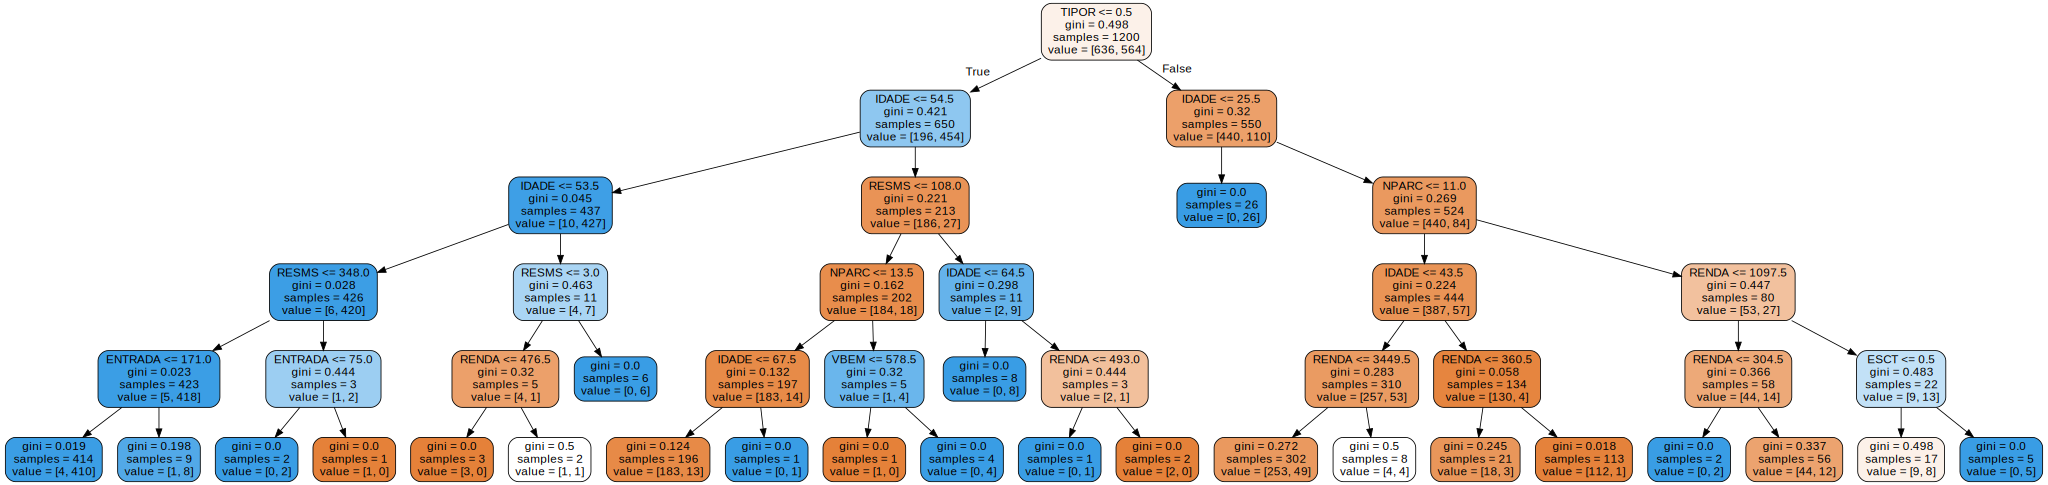

In [ ]:
#Uso do arquivo gerado para visualizar a árvore
Source.from_file('credit_tree.dot')

## 3 Aplicando o modelo treinado

In [ ]:
#Predição no conjunto de validação


In [ ]:
#Visualização das primeiras 10 observações preditas


## 4 Avaliando o desempenho do modelo

O código desta seção será liberado à medida que a aula for publicada no canal Python DS: https://www.youtube.com/playlist?list=PL0XxTDj23A1HYVt2EOttKvaE8UzQoAh3A

In [ ]:
#Matriz de confusão


In [ ]:
#Organização dos dados para visualização da matriz


#Reorganização da matriz confusão para 


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#Visualização Gráfica da Matriz de Confusão


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Visualizaçaõ do relatório de classificação


## 5 Usando o modelo com dados novos

In [ ]:
#Predição no conjunto de testes


In [ ]:
#Organização dos dados para visualização da matriz

#Reorganização da matriz confusão para 


In [ ]:
#Visualização Gráfica da Matriz de Confusão


In [ ]:
#Conferência da matriz de confusão


In [ ]:
#Visualizaçaõ do relatório de classificação


## Referências

Bezerra, Eduardo (2016) **Introdução à Aprendizagem Profunda**. Disponível em: https://www.researchgate.net/publication/309321510_Introducao_a_Aprendizagem_Profunda, julho de 2020.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

Han, Jiawei. Kamber, Micheline. Pei, Jian (2012) **Data Mining**: Concepts and techniques. Morgan Kaufmann, 3rd Edition.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.


---

**Leitura complementar e tutoriais**:
* Variáveis *dummies*: https://www.delftstack.com/pt/howto/python-pandas/get-dummies-pandas/
* Documentação do método pandas.get_dummies: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
* Cálculo da curva de aprendizagem: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
* Definição da estratégia de separação dos conjuntos de treino e validação no cálculo da curva de aprendizagem: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

